## METRICS BASED EVALUATION OF ALL FOUR FINE-TUNED MODELS
Metrics:

1.   BERT SCORE
2.   BLEU SCORE
3.   ROUGE-1 Score
4.   ROUGE-2 Score
5.   ROUGE-L Score





In [ ]:
pip install sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer, util

def calculate_semantic_similarity(candidate, reference):
    # Load the pre-trained BERT model
    model = SentenceTransformer('bert-base-uncased')

    # Encode the candidate and reference sentences
    candidate_embedding = model.encode(candidate, convert_to_tensor=True)
    reference_embedding = model.encode(reference, convert_to_tensor=True)

    # Calculate cosine similarity between the embeddings
    similarity_score = util.pytorch_cos_sim(candidate_embedding, reference_embedding).item()

    return similarity_score

# Example JDs
ref_jd = """
Data Scientist


Responsibilities
Proven knowledge in Natural Language Processing (NLP) & text-processing algorithms
Good knowledge of Python
Experience with data-processing and data-analysis by use of common tools and libraries (e.g. Pandas, Sklearn, Pytorch, -)
Experience with common NLP and ML, Ibraries (eg. SpoCy, Huggingface-transformers, -)
Experience in the area of cloud computing
Good German and English skills as well as the ability to communicate well with remote teams
Your Task
Conceptualize new business-value-driving ideas and solutions to our NLP-related problems.
Design experimentation pipelines for the tteration ond quantitative evaluation of NLP-
related models.
Help in creating the requirements and can help in gathering the needed data for your NLP
experiments.
Communicate regularly with other member in the software department to understond the
needs & problems at appose.


Your benefits
Become port of our international and Take on responsibilities from doy one
interdisciplinary team.
Tailored personal development Fit from day one
Enjoy a variety of coaching and training Take part in circuit training once a week.
Future technology in practice Think outside the box.
Daily opportunities to try something new Work in an exciting and dynamic start-up
and continually learn atmosphere.
"""

# Define the generated job description
gen_jd = """
We are currently looking for a skilled Data Scientist to join our team.

The ideal candidate will have a strong background in Data Science and a profound understanding of the industry.

They should also possess a deep knowledge of natural language processing (NLP) and word processing algorithms.
The main responsibility of a Data Scientist is to extract valuable insights from large datasets using machine learning and statistical techniques.

They will also develop predictive models to support decision-making processes.

Additionally, the Data Scientist will be involved in preprocessing and cleaning data to ensure data quality and accuracy.
The ideal candidate should have a master’s degree in data science or any relevant field.

They should also demonstrate expertise in Python programming and have a strong command of essential tools and libraries such as Pandas, Sklearn, and Pytorch.
Experience with NLP and ML libraries like SpaCy, Huggingface-Transformers, and others is highly valued.

Furthermore, the Data Scientist should have a profound understanding of German and English, with excellent communication skills to collaborate effectively with remote teams.
If you are a highly skilled Data Scientist with a passion for data analysis and machine learning, we would love to hear from you. Apply now to join our team and contribute to our success.
 """

# Calculate semantic similarity
similarity_score = calculate_semantic_similarity(gen_jd, ref_jd)

print(f"Semantic Similarity Score: {similarity_score:.4f}")


Semantic Similarity Score: 0.9146


In [ ]:
!pip install rouge-score


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer

def calculate_bleu_score(candidate, reference):
    # Tokenize the paragraphs into sentences
    candidate_sentences = candidate.split('.')
    reference_sentences = reference.split('.')

    # Tokenize each sentence
    candidate_tokens = [sentence.split() for sentence in candidate_sentences]
    reference_tokens = [sentence.split() for sentence in reference_sentences]

    # Flatten the token lists
    candidate_tokens_flat = [token for sublist in candidate_tokens for token in sublist]
    reference_tokens_flat = [token for sublist in reference_tokens for token in sublist]

    # Apply smoothing to handle cases where candidate_tokens is shorter than reference_tokens
    smoothing_function = SmoothingFunction().method1
    bleu_score = sentence_bleu([reference_tokens_flat], candidate_tokens_flat, smoothing_function=smoothing_function)

    return bleu_score

def calculate_rouge_score(candidate, reference):
    # Initialize the Rouge scorer
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Calculate Rouge scores
    rouge_scores = scorer.score(candidate, reference)

    return rouge_scores

# Example JDs
# ref_jd = """
# Job Title: Front End Developer

# Location: [City, State]

# Job Type: Full-time

# Company Overview:

# [Company Name] is a dynamic and innovative [industry] company dedicated to [brief company mission or values]. We are seeking a talented Front End Developer to join our growing team and contribute to the development of cutting-edge web applications.

# Responsibilities:

# Collaborate with cross-functional teams to analyze, design, and implement front-end solutions for our web applications.
# Develop responsive user interfaces using modern web technologies such as ReactJS, NodeJS, and ExpressJS.
# Work closely with back-end developers to integrate user-facing elements with server-side logic using RESTful APIs and MongoDB.
# Ensure the technical feasibility of UI/UX designs and implement them with a keen eye for detail and user experience.
# Optimize applications for maximum speed and scalability, ensuring a seamless user experience across various devices and browsers.
# Stay up-to-date with industry trends and advancements to continuously improve our front-end development processes.
# Requirements:

# Proven experience as a Front End Developer or similar role.
# Strong proficiency in web technologies such as HTML5, CSS3, and JavaScript.
# Solid experience with ReactJS for building modern, interactive user interfaces.
# Proficient in using NodeJS and ExpressJS for server-side development.
# Experience with MongoDB or other NoSQL databases for efficient data storage and retrieval.
# Familiarity with RESTful APIs and integrating front-end applications with server-side logic.
# Understanding of cross-browser compatibility issues and ways to work around them.
# Excellent problem-solving skills and attention to detail.
# Strong communication and collaboration skills within a team environment.
# Bachelor's degree in Computer Science, Information Technology, or related field (or equivalent work experience).
# Nice-to-Have:

# Experience with state management libraries such as Redux.
# Knowledge of build tools and package managers such as Webpack and npm.
# Familiarity with version control systems, especially Git.
# Understanding of containerization technologies such as Docker.
# Benefits:

# Competitive salary and performance-based bonuses.
# Health, dental, and vision insurance.
# 401(k) retirement plan.
# Flexible work hours and remote work options.
# Professional development opportunities and training.
# If you are a passionate Front End Developer looking to make a significant impact in a growing company, we encourage you to apply. Join us in shaping the future of [industry] through innovative web development!

# How to Apply:

# Please submit your resume and a portfolio showcasing your relevant projects to [email@example.com]. Include a cover letter highlighting your experience and explaining why you would be a great fit for our team
# """

# Define the generated job description
# gen_jd = """
# Job Description: Front End Developer

# We are currently seeking a skilled Front End Developer to join our team. The ideal candidate will have a minimum of three to fourteen years of demonstrated expertise within the industry and a profound understanding of Front End Development. They should also possess a profound understanding of Backend Development.

# Responsibilities:
# - Develop and maintain frontend components, ensuring a user-friendly experience.
# - Collaborate with the UX/UI team to implement design concepts.
# - Optimize frontend performance and user experience.

# Qualifications:
# - Bachelor's degree in Computer Applications or a related field.
# - Strong command of essential frontend technologies such as HTML, CSS, and JavaScript.
# - Experience in working with frameworks like ReactJS.
# - Proficiency in database management systems like MongoDB.
# - Familiarity with server-side technologies such as Node.js and Express.js.
# - Strong problem-solving skills and the ability to work independently.
# - Excellent communication and collaboration skills.

# If you are a highly skilled Front End Developer with a passion for creating intuitive and user-friendly interfaces, we would love to hear from you. Join our team and contribute to the development of innovative web applications.
# """
# Calculate BLEU score
bleu_score = calculate_bleu_score(gen_jd, ref_jd)
print(f"BLEU Score: {bleu_score:.4f}")

# Calculate Rouge scores
rouge_scores = calculate_rouge_score(gen_jd, ref_jd)
print(f"Rouge-1 Score: {rouge_scores['rouge1'].fmeasure:.4f}")
print(f"Rouge-2 Score: {rouge_scores['rouge2'].fmeasure:.4f}")
print(f"Rouge-L Score: {rouge_scores['rougeL'].fmeasure:.4f}")


BLEU Score: 0.0164
Rouge-1 Score: 0.4000
Rouge-2 Score: 0.0993
Rouge-L Score: 0.2222


Results of Metrics Based evaluation

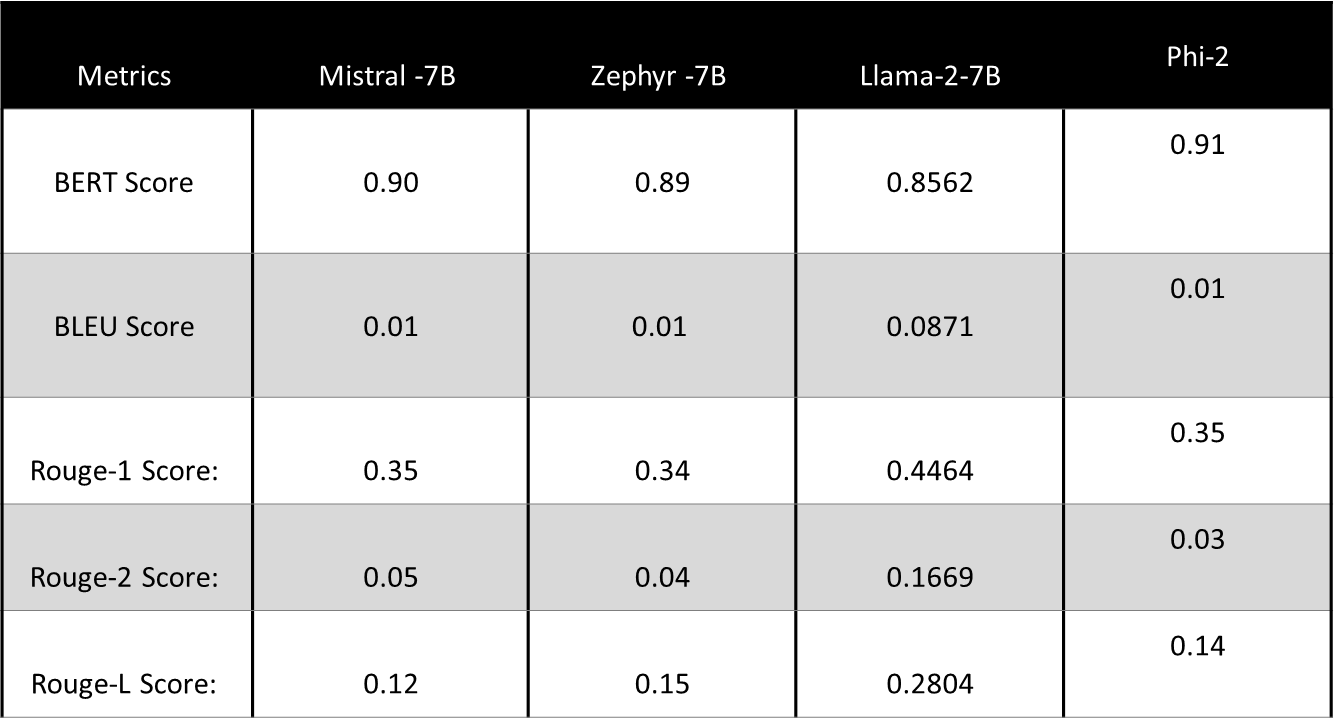